In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [2]:
url = 'C:/Users/aswan/Data analysis/Fintech project/Credit card fraud datasets/customer.csv'

In [3]:
df = pd.read_csv(url)

In [4]:
df.head()

,CUSTOMER_ID,x_customer_id,y_customer_id,mean_amount,std_amount,mean_nb_tx_per_day,available_terminals,nb_terminals
0,0,54.881350,71.518937,62.262521,31.131260,2.179533,"[29, 87, 144, 241, 330, 858, 996, 1028, 1067, ...",22
1,1,42.365480,64.589411,46.570785,23.285393,3.567092,"[5, 160, 242, 378, 431, 475, 571, 762, 876, 93...",20
2,2,96.366276,38.344152,80.213879,40.106939,2.115580,"[316, 406, 447, 523, 968, 1200, 1318, 1365, 16...",10
3,3,56.804456,92.559664,11.748426,5.874213,0.348517,"[65, 94, 113, 364, 401, 433, 485, 651, 672, 77...",17
4,4,2.021840,83.261985,78.924891,39.462446,3.480049,"[372, 614, 774, 1362, 1446, 1564, 1637, 1939]",8


In [7]:
df.set_index('CUSTOMER_ID', inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   x_customer_id        1000 non-null   float64
 1   y_customer_id        1000 non-null   float64
 2   mean_amount          1000 non-null   float64
 3   std_amount           1000 non-null   float64
 4   mean_nb_tx_per_day   1000 non-null   float64
 5   available_terminals  1000 non-null   object 
 6   nb_terminals         1000 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 62.5+ KB


In [9]:
df.describe()

,x_customer_id,y_customer_id,mean_amount,std_amount,mean_nb_tx_per_day,nb_terminals
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,51.318204,50.397990,51.550697,25.775348,1.956983,15.117000
std,28.893939,28.785699,28.025746,14.012873,1.165512,4.255987
min,0.007245,0.036734,5.063101,2.531550,0.000295,2.000000
25%,27.099437,26.737835,27.596718,13.798359,0.931062,12.000000
50%,50.601090,49.109879,51.596026,25.798013,1.886714,15.000000
75%,76.422770,76.377724,75.304416,37.652208,2.994755,18.000000
max,99.994897,99.996402,99.981815,49.990907,3.999725,28.000000


In [10]:
df.isnull().sum()

x_customer_id          0
y_customer_id          0
mean_amount            0
std_amount             0
mean_nb_tx_per_day     0
available_terminals    0
nb_terminals           0
dtype: int64

In [12]:
df.duplicated().sum()

0

In [13]:
df.corr()

,x_customer_id,y_customer_id,mean_amount,std_amount,mean_nb_tx_per_day,nb_terminals
x_customer_id,1.000000,0.028458,-0.012328,-0.012328,-0.064236,-0.032064
y_customer_id,0.028458,1.000000,0.003894,0.003894,0.002019,0.109816
mean_amount,-0.012328,0.003894,1.000000,1.000000,0.013099,-0.034329
std_amount,-0.012328,0.003894,1.000000,1.000000,0.013099,-0.034329
mean_nb_tx_per_day,-0.064236,0.002019,0.013099,0.013099,1.000000,0.067778
nb_terminals,-0.032064,0.109816,-0.034329,-0.034329,0.067778,1.000000


### Initial Insight

- Total number of rows are 1000 and columns are 7. There is only 1000 customers transaction details is here.
- The datatypes are 6 float64, 1 int64 and 1 object.
- There is no null value and duplicate values.
- 'mean_amount' and 'std_amount' has a strong positive correlation, others are not considerable.

### Univariate Analysis

<AxesSubplot: ylabel='Density'>

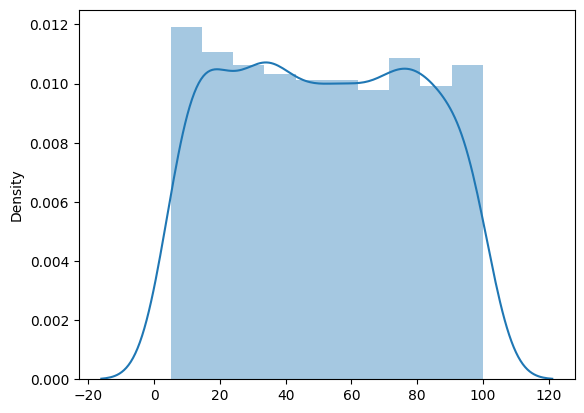

In [17]:
# Distribution of mean_amount
sns.distplot(x=df.mean_amount, kde=True)

<AxesSubplot: ylabel='Density'>

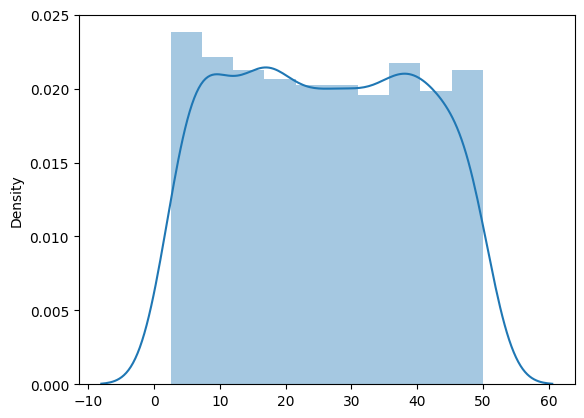

In [18]:
# Distribution of std_amount
sns.distplot(x=df.std_amount, kde=True)

<AxesSubplot: ylabel='Density'>

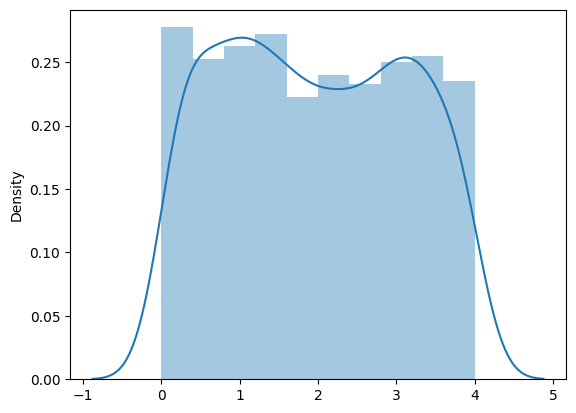

In [19]:
# Distribution of mean_nb_tx_per_day
sns.distplot(x=df.mean_nb_tx_per_day, kde=True)

<AxesSubplot: ylabel='Density'>

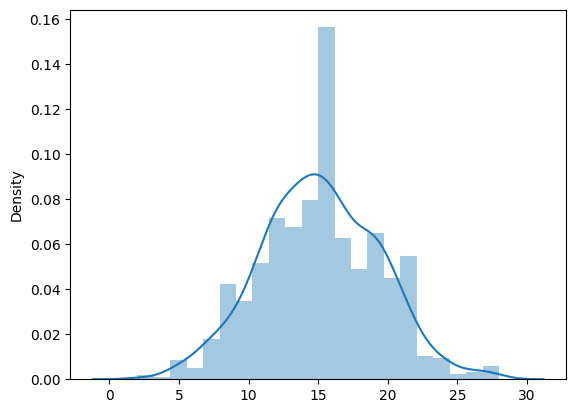

In [20]:
# Distribution of nb_terminals
sns.distplot(x=df.nb_terminals, kde=True)

<AxesSubplot: xlabel='nb_terminals'>

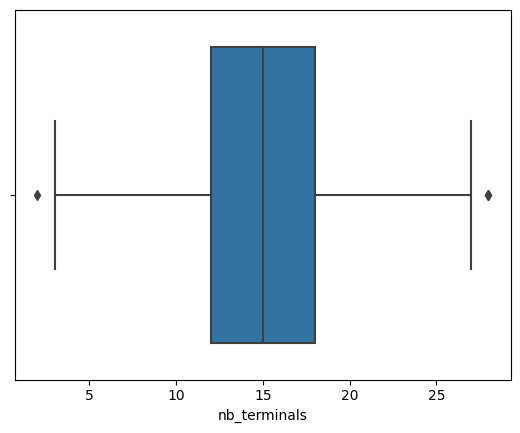

In [21]:
sns.boxplot(x=df.nb_terminals)

In [22]:
df.columns

Index(['x_customer_id', 'y_customer_id', 'mean_amount', 'std_amount',
       'mean_nb_tx_per_day', 'available_terminals', 'nb_terminals'],
      dtype='object')

### Insight 
- 'mean_amount', 'std_amount', 'mean_nb_tx_per_day' are almost uniform distribution.
- 'nb_terminals' is normal distribution. with two outliers on both end.